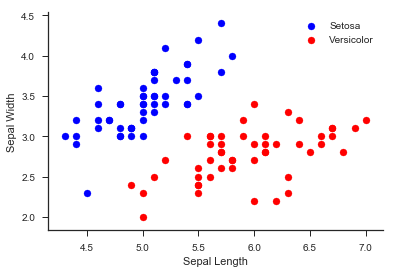

In [55]:
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style='ticks', palette='Set2')
import pandas as pd
import numpy as np
import math
from __future__ import division

data = datasets.load_iris()
X = data.data[:100, :2]
y = data.target[:100]
X_full = data.data[:100, :]

setosa = plt.scatter(X[:50,0], X[:50,1], c='b')
versicolor = plt.scatter(X[50:,0], X[50:,1], c='r')
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend((setosa, versicolor), ("Setosa", "Versicolor"))
sns.despine()

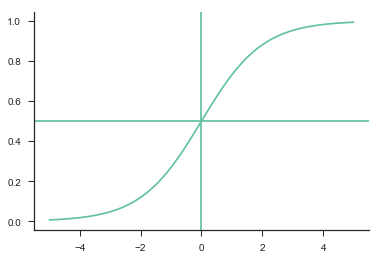

In [56]:
x_values = np.linspace(-5, 5, 100)
y_values = [1 / (1 + math.e**(-x)) for x in x_values]
plt.plot(x_values, y_values)
plt.axhline(.5)
plt.axvline(0)
sns.despine()

In [57]:
from IPython.display import Image
Image(url="http://www.me.utexas.edu/~jensen/ORMM/models/unit/nonlinear/subunits/terminology/graphics/convex1.gif")

In [62]:
def logistic_func(b, x):
    return float(1) / (1 + math.e**(-x.dot(b)))  #f(x)
def log_gradient(b, x, y):
    first_calc = logistic_func(b, x) - y   # [yi - f(xi)]
    final_calc = first_calc.T.dot(x) #  # [yi - f(xi)]Xi
    return final_calc
def cost_func(b, x, y):
    log_func_v = logistic_func(b,x)
    step1 = y * np.log(log_func_v)   # yi*log (f(xi))
    step2 = (1-y) * np.log(1 - log_func_v) #(1-yi)*log(1-f(xi))
    final = -step1 - step2
    #print("--------",final)
    return np.mean(final)

def grad_desc(b_values, X, y, lr=.001, converge_change=.001):
    #normalize
    #X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)
    #setup cost iter
    cost_iter = []
    cost = cost_func(b_values, X, y)
    cost_iter.append([0, cost])
    change_cost = converge_change + 1
    i = 1
    while(change_cost > converge_change):
        old_cost = cost
        b_values = b_values - (lr * log_gradient(b_values, X, y))   # bi= bi - [- lr([yi - f(xi)]Xi)]
        cost = cost_func(b_values, X, y)
        cost_iter.append([i, cost])
        change_cost = old_cost - cost
        i+=1
    return b_values, np.array(cost_iter)

def pred_values(b, X, hard=True):
    #normalize
    #X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)
    pred_prob = logistic_func(b, X)
    pred_value = np.where(pred_prob >= .5, 1, 0)
    if hard:
        return pred_value
    return pred_prob

In [63]:
shape = X.shape[1]
y_flip = np.logical_not(y) #flip Setosa to be 1 and Versicolor to zero to be consistent
betas = np.zeros(shape)
fitted_values, cost_iter = grad_desc(betas, X, y_flip)
print(fitted_values)

[-1.18974362  2.08100246]


In [64]:
cost_iter

array([[  0.        ,   0.69314718],
       [  1.        ,   0.68590007],
       [  2.        ,   0.67952028],
       [  3.        ,   0.67324189],
       [  4.        ,   0.66706323],
       [  5.        ,   0.66098267],
       [  6.        ,   0.65499858],
       [  7.        ,   0.64910933],
       [  8.        ,   0.64331334],
       [  9.        ,   0.63760902],
       [ 10.        ,   0.63199479],
       [ 11.        ,   0.6264691 ],
       [ 12.        ,   0.62103042],
       [ 13.        ,   0.61567722],
       [ 14.        ,   0.61040801],
       [ 15.        ,   0.6052213 ],
       [ 16.        ,   0.60011563],
       [ 17.        ,   0.59508955],
       [ 18.        ,   0.59014163],
       [ 19.        ,   0.58527048],
       [ 20.        ,   0.5804747 ],
       [ 21.        ,   0.57575293],
       [ 22.        ,   0.57110383],
       [ 23.        ,   0.56652607],
       [ 24.        ,   0.56201834],
       [ 25.        ,   0.55757937],
       [ 26.        ,   0.5532079 ],
 

In [67]:
predicted_y = pred_values(fitted_values, X,hard = True)
predicted_y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [68]:
np.sum(y_flip == predicted_y)

99

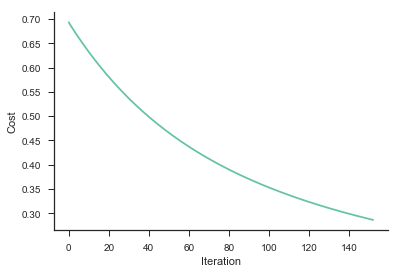

In [69]:
plt.plot(cost_iter[:,0], cost_iter[:,1])
plt.ylabel("Cost")
plt.xlabel("Iteration")
sns.despine()

In [14]:
from sklearn import linear_model
logreg = linear_model.LogisticRegression()
logreg.fit(X, y_flip)
sum(y_flip == logreg.predict(X))

99